In [48]:
import pandas as pd
import numpy as np
import os
from glob import glob
from tqdm.auto import tqdm

In [49]:
dfs = []
for file in tqdm(glob("res_tmp/*/*.csv")):
    df = pd.read_csv(file)
    df['dataset'] = file.split('/')[-1].split('|')[0]
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

df

  0%|          | 0/25060 [00:00<?, ?it/s]

,max_depth,prune_useless_leaves,stump_selection,random_state,splitter,base_stumps,distance_measure,DecisionTreeStumpClassifier,ObliqueDecisionTreeStumpClassifier,PivotTreeStumpClassifier,...,precision_macro,precision_weighted,recall_score,recall_micro,recall_macro,recall_weighted,n_leaf,n_nodes,resulting_max_depth,dataset
0,10.0,True,best,42,best,"['DecisionTreeStumpClassifier', 'ObliqueDecisi...",euclidean,"{'max_depth': 1, 'random_state': 42}","{'max_depth': 1, 'random_state': 42, 'oblique_...","{'max_depth': 1, 'random_state': 42}",...,0.664286,0.665986,0.620690,0.666667,0.663286,0.666667,16,15,7,sonar
1,3.0,True,random,42,best,['PartialProximityTreeStumpClassifier'],euclidean,NaN,NaN,NaN,...,0.527778,0.529982,0.310345,0.539683,0.522819,0.539683,6,5,4,sonar
2,1.0,True,random,42,best,"['DecisionTreeStumpClassifier', 'ObliqueDecisi...",euclidean,"{'max_depth': 1, 'random_state': 42}","{'max_depth': 1, 'random_state': 42, 'oblique_...","{'max_depth': 1, 'random_state': 42}",...,0.269841,0.291257,0.000000,0.539683,0.500000,0.539683,1,0,1,sonar
3,10.0,True,best,42,best,['PartialProximityTreeStumpClassifier'],euclidean,NaN,NaN,NaN,...,0.753571,0.758957,0.827586,0.746032,0.752028,0.746032,65,64,11,sonar
4,1.0,True,random,42,best,['PartialProximityTreeStumpClassifier'],euclidean,NaN,NaN,NaN,...,0.564449,0.568492,0.655172,0.555556,0.562880,0.555556,2,1,2,sonar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25055,7.0,True,best,42,best,"['DecisionTreeStumpClassifier', 'ObliqueDecisi...",euclidean,"{'max_depth': 1, 'random_state': 42}","{'max_depth': 1, 'random_state': 42, 'oblique_...","{'max_depth': 1, 'random_state': 42}",...,0.761897,0.811845,0.806452,0.806452,0.770370,0.806452,19,18,8,vertebral
25056,7.0,True,random,42,best,['PartialPivotTreeStumpClassifier'],euclidean,NaN,NaN,NaN,...,0.720238,0.754608,0.763441,0.763441,0.707407,0.763441,30,29,8,vertebral
25057,2.0,True,random,42,best,['PartialProximityTreeStumpClassifier'],euclidean,NaN,NaN,NaN,...,0.484259,0.609767,0.731183,0.731183,0.600000,0.731183,3,2,3,vertebral
25058,2.0,True,random,42,best,"['DecisionTreeStumpClassifier', 'ObliqueDecisi...",euclidean,"{'max_depth': 1, 'random_state': 42}","{'max_depth': 1, 'random_state': 42, 'oblique_...","{'max_depth': 1, 'random_state': 42}",...,0.658943,0.722659,0.709677,0.709677,0.637037,0.709677,4,3,3,vertebral


In [68]:
df['n_features_strategy_pp'] = df.PartialPivotTreeStumpClassifier\
            .apply(lambda x: x[x.index('n_features_strategy')+22:].split(',')[0] if not pd.isna(x) else "")

df['n_features_strategy_ppx'] = df.PartialProximityTreeStumpClassifier\
            .apply(lambda x: x[x.index('n_features_strategy')+22:].split(',')[0] if not pd.isna(x) else "")



df['selection_pp'] = df.PartialPivotTreeStumpClassifier\
            .apply(lambda x: x[x.index('selection')+12:].split(',')[0] if not pd.isna(x) else "")

df['selection_ppx'] = df.PartialProximityTreeStumpClassifier\
            .apply(lambda x: x[x.index('selection')+12:].split(',')[0] if not pd.isna(x) else "")

In [69]:

df['n_features_strategy'] = df[['n_features_strategy_ppx', 'n_features_strategy_pp']].apply(lambda x: "_".join(x), axis=1)
df['selection'] = df[['selection_ppx', 'selection_pp']].apply(lambda x: "_".join(x), axis=1)


In [70]:
pd.set_option('display.max_rows', 100)

cols = ['dataset', 'base_stumps', 'stump_selection', 'f1_macro', 'max_depth', 'n_leaf', 'n_nodes', 'n_features_strategy', 'selection']

df.sort_values(by=["dataset", 'f1_macro', 'n_features_strategy'], ascending=False).groupby(["dataset", "base_stumps"]).head(1)[cols]

,dataset,base_stumps,stump_selection,f1_macro,max_depth,n_leaf,n_nodes,n_features_strategy,selection
631,wine,['DecisionTreeStumpClassifier'],best,0.344192,NaN,1260,1259,_,_
476,wine,['ObliqueDecisionTreeStumpClassifier'],random,0.330508,NaN,1240,1239,_,_
690,wine,['PartialPivotTreeStumpClassifier'],random,0.330244,NaN,1926,1925,_11,_'random'
427,wine,['MultiplePivotTreeStumpClassifier'],random,0.316831,NaN,2697,2696,_,_
485,wine,['ObliquePivotTreeStumpClassifier'],best,0.307650,NaN,1446,1445,_,_
...,...,...,...,...,...,...,...,...,...
1777,adult,['MultiplePivotTreeStumpClassifier'],best,0.597664,1.0,2,1,_,_
1770,adult,['DecisionTreeStumpClassifier'],best,0.431572,1.0,1,0,_,_
1781,adult,['ObliqueDecisionTreeStumpClassifier'],best,0.431572,1.0,1,0,_,_
1785,adult,['MultipleObliquePivotTreeStumpClassifier'],best,0.431572,1.0,1,0,_,_


In [71]:
len("['DecisionTreeStumpClassifier', 'ObliqueDecisionTreeStumpClassifier', 'PivotTreeStumpClassifier', 'MultiplePivotTreeStumpClassifier', 'ObliquePivotTreeStumpClassifier', 'MultipleObliquePivotTreeStumpClassifier']")

211

In [80]:
from aeon.visualisation import plot_critical_difference

df_aeon = df.sort_values(by=["dataset", 'f1_macro', 'n_features_strategy'], ascending=False)\
                .groupby(["dataset", "base_stumps"]).head(1)[cols]

df_aeon = df_aeon.pivot(index='dataset', columns='base_stumps', values='f1_macro')

df_aeon = df_aeon.dropna()

df_aeon_rename = {
    val: 'hybrid' if len(val) > 220 else val.split("'")[-2] if len(val) < 100 else 'hybrid_no_partial'
    for val in (df_aeon.columns)
}

df_aeon = df_aeon.rename(columns=df_aeon_rename)

df_aeon

base_stumps,hybrid,hybrid_no_partial,DecisionTreeStumpClassifier,MultipleObliquePivotTreeStumpClassifier,MultiplePivotTreeStumpClassifier,ObliqueDecisionTreeStumpClassifier,ObliquePivotTreeStumpClassifier,PartialPivotTreeStumpClassifier,PartialProximityTreeStumpClassifier,PivotTreeStumpClassifier
dataset,,,,,,,,,,
auction,0.958195,0.926552,0.981330,0.939224,0.933896,0.977721,0.882483,0.928249,0.938525,0.855986
breast,0.974697,0.922973,0.907895,0.929659,0.943637,0.907895,0.909428,0.936742,0.968479,0.922973
compass,0.973535,0.973997,0.973535,0.857932,0.847202,0.973535,0.697541,0.747832,0.973535,0.715333
diabetes,0.778736,0.716402,0.769681,0.748711,0.674750,0.760330,0.682404,0.727404,0.743333,0.711483
heloc,0.714944,0.707465,0.714309,0.673817,0.678658,0.713891,0.648420,0.672834,0.705644,0.664178
home,0.938851,0.904287,0.910988,0.705682,0.736309,0.918382,0.687132,0.857005,0.896950,0.671499
ionosphere,0.957937,0.915873,0.915873,0.904705,0.901801,0.914688,0.907153,0.938467,0.925882,0.936905
iris,0.977753,0.955556,0.977753,0.933259,0.977753,0.955556,0.933259,0.977753,1.000000,0.955357
titanic,0.815791,0.773799,0.763131,0.665713,0.632687,0.760714,0.655906,0.762380,0.800595,0.650869


(<Figure size 600x290 with 1 Axes>, <Axes: >)

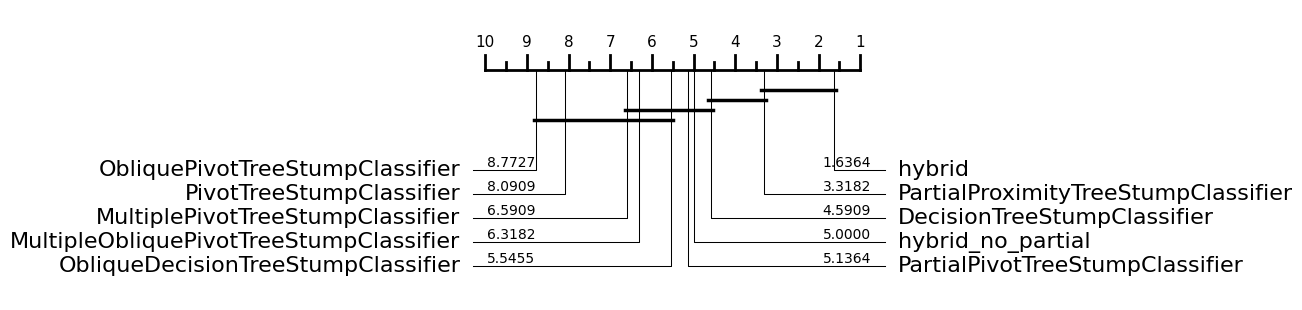

In [81]:
plot_critical_difference(df_aeon.values, labels=list(df_aeon.columns))

(<Figure size 600x290 with 1 Axes>, <Axes: >)

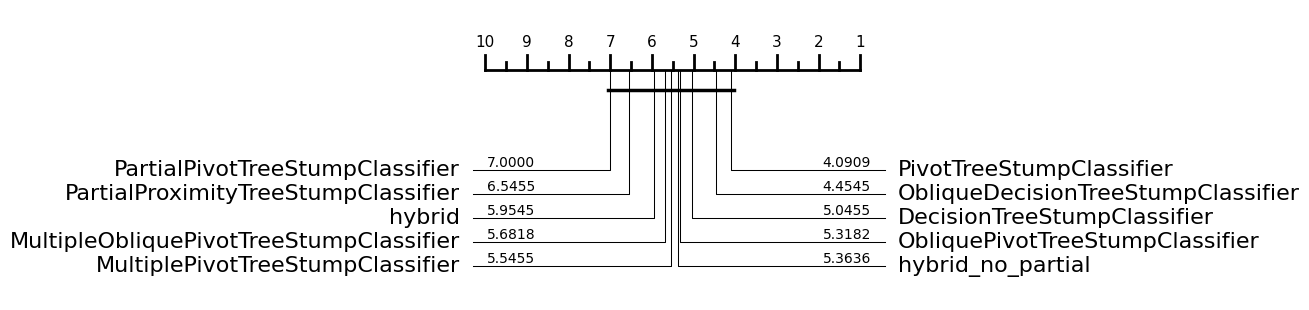

In [82]:
df_aeon = df.sort_values(by=["dataset", 'f1_score', 'n_features_strategy'], ascending=False)\
                .groupby(["dataset", "base_stumps"]).head(1)[cols]

df_aeon = df_aeon.pivot(index='dataset', columns='base_stumps', values='n_nodes')

df_aeon = df_aeon.dropna()

df_aeon = df_aeon.rename(columns=df_aeon_rename)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=True)

(<Figure size 600x290 with 1 Axes>, <Axes: >)

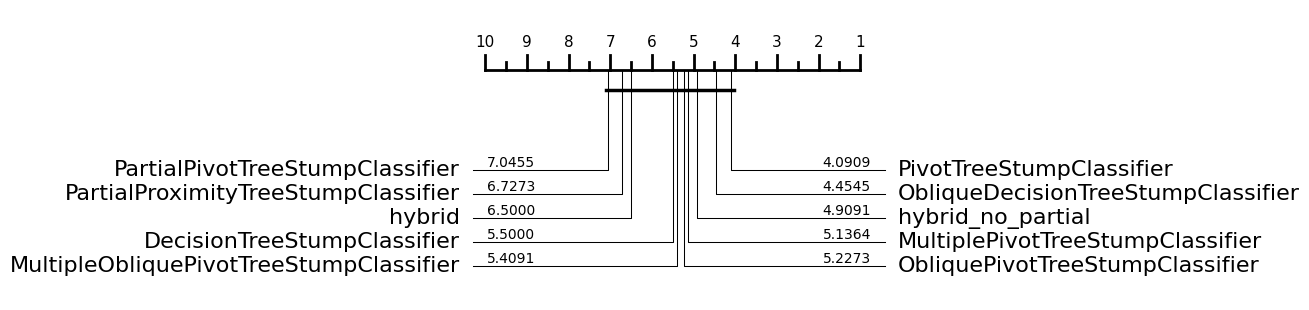

In [83]:
df_aeon = df.sort_values(by=["dataset", 'f1_score', 'n_features_strategy'], ascending=False)\
                .groupby(["dataset", "base_stumps"]).head(1)

df_aeon = df_aeon.pivot(index='dataset', columns='base_stumps', values='resulting_max_depth')

df_aeon = df_aeon.dropna()

df_aeon = df_aeon.rename(columns=df_aeon_rename)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=True)

In [ ]:
df_aeon = df.sort_values(by=["dataset", 'f1_score', 'n_features_strategy'], ascending=False)\
                .groupby(["dataset", "base_stumps"]).head(1)[cols]

df_aeon = df_aeon.pivot(index='dataset', columns='base_stumps', values='n_leaf')

df_aeon = df_aeon.dropna()

df_aeon_rename = {
    val: 'hybrid' if len(val) > 50 else val.split("'")[-2]
    for val in (df_aeon.columns)
}

df_aeon = df_aeon.rename(columns=df_aeon_rename)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=True)

(<Figure size 600x290 with 1 Axes>, <Axes: >)

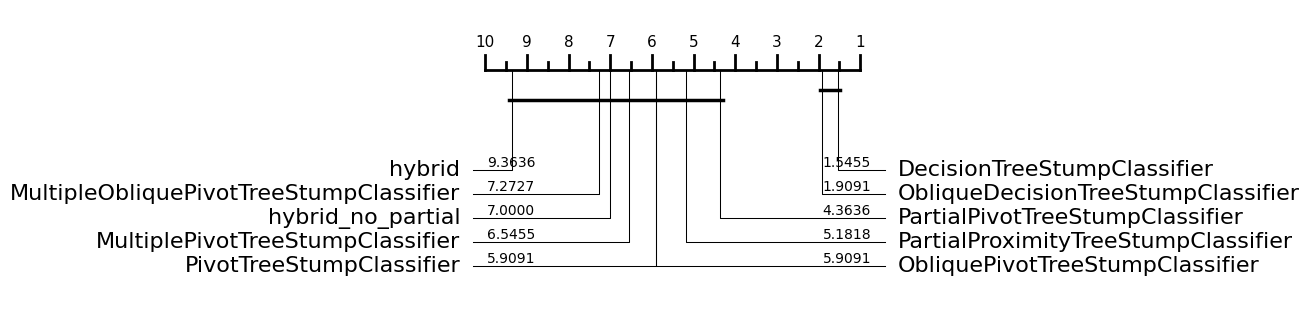

In [84]:
df_aeon = df.sort_values(by=["dataset", 'f1_score', 'n_features_strategy'], ascending=False)\
                .groupby(["dataset", "base_stumps"]).head(1)

df_aeon = df_aeon.pivot(index='dataset', columns='base_stumps', values='train_time')

df_aeon = df_aeon.dropna()

df_aeon = df_aeon.rename(columns=df_aeon_rename)

plot_critical_difference(df_aeon.values, labels=df_aeon.columns, lower_better=True)

In [88]:
inter = None

for dataset_set in df.groupby(by=['base_stumps','max_depth'])['dataset'].agg(set):
    if inter is None:
        inter = dataset_set
    else:
        inter = inter.intersection(dataset_set)
print(inter)

{'iris', 'compass', 'vertebral', 'diabetes', 'titanic', 'home', 'auction'}


  0%|          | 0/10 [00:00<?, ?it/s]

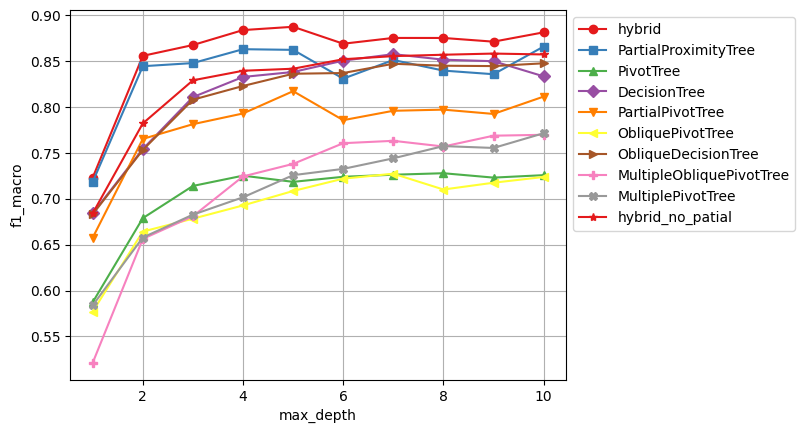

In [89]:
import matplotlib.pyplot as plt

offsets = np.linspace(-0.3, 0.3, len(df.base_stumps.unique()))
colors = plt.get_cmap('Set1').colors
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'P', 'X', '*']

for i, base_stumps in enumerate(tqdm(df.base_stumps.unique())):
    df_base_stumps = df[(df.base_stumps == base_stumps) & df.dataset.isin(inter)]
    grouped = df_base_stumps.sort_values(by=["dataset", 'f1_macro', 'max_depth'], ascending=False).groupby(['dataset', 'max_depth']).head(1)
    grouped = grouped.reset_index().groupby(['max_depth'])['f1_macro'].agg(['mean', 'std'])

    label = base_stumps
    if len(label) > 220:
        label='hybrid'
    elif len(label) > 100:
        label='hybrid_no_patial'
    else:
        label = label.split("'")[-2].replace("StumpClassifier", '')
    
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    plt.plot(grouped.index, grouped['mean'], label=label, color=color, marker=marker)
    #x = grouped.index + offsets[i]
    #plt.errorbar(x, grouped['mean'], yerr=grouped['std'], label=label, capsize=3, fmt='o-', color=color)

plt.xlabel('max_depth')
plt.ylabel('f1_macro')
plt.legend()
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()